In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(0)

In [4]:
ref = pd.read_excel("D:\IIT\PhD projects\_dG study\datasets\circle seq off-target dataset.xlsx")

In [5]:
df = pd.read_excel("D:\IIT\PhD projects\_dG study\dG for off-t sets\circleseq-with-dG.xlsx")
df.head()

,target,off-target,reads,dG(rec3-hybrid),dG(DNA-RNA),cell,#mm,reads/target/cell line
0,GAACACAAAGCATAGACTGCGGG,AAACATAAAGCATAGACTGCAAA,0,-134.08,-165.35,HEK293,4,0.000000
1,GAACACAAAGCATAGACTGCGGG,AAACATAAAGCATAGACTGCAAA,10,-134.08,-165.35,K562,4,0.002725
2,GAACACAAAGCATAGACTGCGGG,GAACACAATGCATAGATTGCCGG,196,-125.18,-146.79,HEK293,2,0.112000
3,GAACACAAAGCATAGACTGCGGG,GAACACAATGCATAGATTGCCGG,338,-125.18,-146.79,K562,2,0.092098
4,GAACACAAAGCATAGACTGCGGG,GAACACAAAGCATAGACTGCGGG,1750,-120.50,-177.14,HEK293,0,1.000000


In [6]:
ref_target=[]
for i in range(len(ref)):
    ref_target.append(ref.loc[i, "TargetSequence"])

In [7]:
ref_offtarget =[]
for i in range(len(ref)):
    ref_offtarget.append(ref.loc[i,"Off-target Sequence"])

In [8]:
ref_cell = []
for i in range(len(ref)):
    ref_cell.append(ref.loc[i,"Cell"])

In [9]:
df_target =[]
for i in range(len(df)):
    df_target.append(df.loc[i,"target"])

In [10]:
df_offtarget = []
for i in range(len(df)):
    df_offtarget.append(df.loc[i, "off-target"])

In [11]:
df_cell= []
for i in range(len(df)):
    df_cell.append(df.loc[i,"cell"])

In [12]:
#to find missing values in df dataframe
for i in range(len(df)):
    for j in range(len(ref)):
        if (df_target[i] == ref_target[j]) & (df_cell[i] == ref_cell[j]):
            if df_offtarget[i][:20] == ref_offtarget[j][:20]:
                df_offtarget[i] = ref_offtarget[j]

In [13]:
for i in range(len(df_offtarget)):
    if len(df_offtarget[i]) == 20:
        print(i)
    else:
        pass

118
121
172


In [14]:
df_offtarget[121] = "AGCACCATGGCTAGAGGTGTGGG"
df_offtarget[118] = "GGCACTGCAGCCTGGGGGTGGGG"
df_offtarget[172] = "GGTGAGTGAGTGTGTGCGGGTGG"
df_cell[121] = "HEK293"
df_cell[118] = "HEK293"
df_cell[172] = "U2OS"
df["Chromosome"] = ref["Chromosome"]
df.loc[121,"Chromosome"] = 6
df.loc[118, "Chromosome"] = 10
df.loc[172, "Chromosome"] = 11
df.loc[121, "#mm"] = 6
df.loc[118, "#mm"] =6
df.loc[172, "#mm"] =1
df["Strand"] = ref["Strand"]
df.loc[121, "Strand"] = '-'
df.loc[118, "Strand"] = '-'
df.loc[172, "Strand"]='+'

In [15]:
df_cellH = []
df_cellK = []
df_cellU = []

In [16]:
#one hot encoding for df_cell
for i in range(len(df)):
    if df_cell[i][0] == 'K' :
        df_cellH.append(0)
        df_cellK.append(1)
        df_cellU.append(0)
    elif df_cell[i][0] == 'H':
        df_cellH.append(1)
        df_cellK.append(0)
        df_cellU.append(0)
    elif df_cell[i][0] == 'U':
        df_cellH.append(0)
        df_cellK.append(0)
        df_cellU.append(1)

In [17]:
#to make a 2D array pos_mm to store 1 at places where there is a mismatch in the sequences
pos_mm = []
for i in range(len(df)):
    l=[]
    for j in range(23):
        if (df_target[i][j]== df_offtarget[i][j] or df_target[i][j] == 'N' or df_offtarget[i][j] == 'N'):
            l.append(0)
        else:
            l.append(1)
    x = np.transpose(l)
    pos_mm.append(x)

In [18]:
x = pd.DataFrame(pos_mm, columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])

In [19]:
len(df_cellH)

186

In [20]:
x['Cell H'] = df_cellH
x['Cell K'] = df_cellK
x['Cell U'] = df_cellU
x['Chromosome'] = df[['Chromosome']]
x['#mm'] = df[['#mm']]

In [21]:
df.loc[67, "Strand"]

'+'

In [22]:
len(df)

186

In [23]:
#convert strand into numeric values
strand = []
for i in range(len(df)):
    if df.loc[i,"Strand"] == "+":
        df.loc[i,"Strand"] = 1
    elif df.loc[i,"Strand"] == "-":
        df.loc[i,"Strand"] = 0
    else:
        pass

In [24]:
df["Strand"]

0      1
1      0
2      1
3      0
4      1
      ..
181    1
182    0
183    1
184    1
185    1
Name: Strand, Length: 186, dtype: int64

In [25]:
x['Strand'] = df[['Strand']]

In [26]:
#to form lists of transitions, transversions and indels in the Off-target Sequence
count_transversions=[]
count_transitions =[]
count_indels=[]


for i in range(len(x)):
    a=0
    b=0
    c=0
    for j in range(23):
        if (df_target[i][j] == 'A') and ((df_offtarget[i][j] == 'C') or (df_offtarget[i][j] == 'T')):
            a=a+1
        elif (df_target[i][j] == 'G') and ((df_offtarget[i][j] == 'T') or (df_offtarget[i][j] == 'C')):
            a=a+1
        elif (df_target[i][j] == 'C') and ((df_offtarget[i][j] == 'G') or (df_offtarget[i][j] == 'A')):
            a=a+1
        elif (df_target[i][j] == 'T') and ((df_offtarget[i][j] == 'A') or (df_offtarget[i][j] == 'G')):
            a=a+1
        elif (df_target[i][j] == 'A') and (df_offtarget[i][j] == 'G'):
            b=b+1
        elif (df_target[i][j] == 'G') and (df_offtarget[i][j] == 'A'):
            b=b+1
        elif (df_target[i][j] == 'C') and (df_offtarget[i][j] == 'T'):
            b=b+1
        elif (df_target[i][j] == 'T') and (df_offtarget[i][j] == 'C'):
            b=b+1
        elif (df_offtarget[i][j] == '-'):
            c=c+1
        else:
            pass
    count_transversions.append(a)
    count_transitions.append(b)
    count_indels.append(c)

In [27]:
#to form list of pam_transitions, pam_transversions and pam_indels in last position of off-target Sequence
pam_transversions1=[]
pam_transitions1 =[]
pam_indels1=[]

for i in range(len(x)):
    if ((df_offtarget[i][-1]) == 'G'):
        pam_transversions1.append(0)
        pam_transitions1.append(0)
        pam_indels1.append(0)
    
    elif (df_offtarget[i][-1] == 'A'):
        pam_transitions1.append(1)
        pam_transversions1.append(0)
        pam_indels1.append(0)
    
    elif (df_offtarget[i][-1] =='C') or (df_offtarget[i][-1] == 'T'):
        pam_transversions1.append(1)
        pam_transitions1.append(0)
        pam_indels1.append(0)
    
    elif (df_offtarget[i][-1] == '-'):
        pam_indels1.append(1)
        pam_transitions1.append(0)
        pam_transversions1.append(0)
    
    else:
        pass

In [28]:
#to form list of pam_transitions, pam_transversions and pam_indels in second last position of off-target Sequence
pam_transversions2=[]
pam_transitions2 =[]
pam_indels2=[]

for i in range(len(x)):
    if ((df_offtarget[i][-2]) == 'G'):
        pam_transversions2.append(0)
        pam_transitions2.append(0)
        pam_indels2.append(0)
    elif (df_offtarget[i][-2] == 'A'):
        pam_transitions2.append(1)
        pam_transversions2.append(0)
        pam_indels2.append(0)
    elif (df_offtarget[i][-2] =='C'):
        pam_transversions2.append(1)
        pam_transitions2.append(0)
        pam_indels2.append(0)
    elif (df_offtarget[i][-2] == 'T'):
        pam_transversions2.append(1)
        pam_transitions2.append(0)
        pam_indels2.append(0)
    elif (df_offtarget[i][-2] == '-'):
        pam_indels2.append(1)
        pam_transitions2.append(0)
        pam_transversions2.append(0)
    
    else:
        print(i)

In [29]:
pam_transitions = []
pam_transversions = []
pam_indels = []
for i in range(len(df)):
    pam_transitions.append(pam_transitions1[i] + pam_transitions2[i])
    pam_transversions.append(pam_transversions1[i] + pam_transversions2[i])
    pam_indels.append(pam_indels1[i]+pam_indels2[i])

In [30]:
#to calculate distance in x
distance = []
for i in range(len(x)):
    a = pam_transitions[i]+pam_transversions[i]+pam_indels[i]+count_transitions[i]+count_transversions[i]+count_indels[i]
    distance.append(a)

In [31]:
#to calculate pam_mm in x
pam_mm =[]
for i in range(len(x)):
    a = pam_transitions[i]+pam_transversions[i]+pam_indels[i]
    pam_mm.append(a)
x['pam_mm'] = pam_mm

In [32]:
#to calculate percent of G and C in off-target Sequence
percent_gc = []
for i in range(len(x)):
    a=0
    for j in range(23):
        if (df_offtarget[i][j] == 'G' or df_offtarget[i][j]== 'C'):
            a= a+1
    percent_gc.append((a/len(df_offtarget[i]))*100)    

In [33]:
#to calculate number of G and C from position 11 to 20 in Off-target Sequence
seed_gc = []
for i in range(len(x)):
    a=0
    for j in range(10):
        if (df_offtarget[i][-1-(j+3)] =='G' or df_offtarget[i][-1-(j+3)] == 'C'):
            a=a+1
    seed_gc.append((a/10)*100)

In [34]:
x['pam_transitions'] = pam_transitions
x['pam_transversions'] = pam_transversions
x['pam_indels'] = pam_indels
x['count_transitions'] = count_transitions
x['count_transversions'] = count_transversions
x['count_indels'] = count_indels
x['distance'] = distance
x['percent_gc'] = percent_gc
x['seed_gc'] = seed_gc
x['dG_rec3'] = df[['dG(rec3-hybrid)']]
x['dG_DNA'] = df[['dG(DNA-RNA)']]

In [35]:
x.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Cell H',
       'Cell K', 'Cell U', 'Chromosome', '#mm', 'Strand', 'pam_mm',
       'pam_transitions', 'pam_transversions', 'pam_indels',
       'count_transitions', 'count_transversions', 'count_indels', 'distance',
       'percent_gc', 'seed_gc', 'dG_rec3', 'dG_DNA'],
      dtype='object')

In [36]:
#to convert Chromosome column into integers
for i in range(len(x)):
    if (x.loc[i,"Chromosome"] == 'X'):
        x.loc[i,"Chromosome"] = 23
    elif (x.loc[i,"Chromosome"] == 'Y'):
        x.loc[i,"Chromosome"] = 24
    else:
        pass

In [37]:
y = []
for i in range(len(df)):
    y.append(df.loc[i,"reads/target/cell line"])

In [40]:
data=x
data['y'] = y
data.drop(["count_indels", "pam_indels"], axis=1, inplace = True)

In [41]:
#x.drop(["y"], axis=1, inplace=True)
a = data.columns

In [ ]:
#to plot co-relation matrix
import seaborn as sbs
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,8))
heat_map = sbs.heatmap(corr, xticklabels = data.columns, yticklabels = data.columns, cmap="YlGnBu")

<Figure size 4320x2160 with 0 Axes>

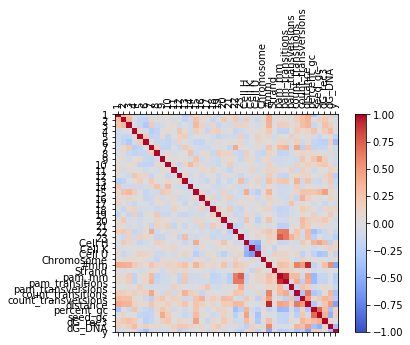

<Figure size 4320x2160 with 0 Axes>

In [43]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.figure(figsize=(60,30))

In [44]:
corr.iloc[1][2]

0.3255389083412324

In [45]:
#to find co-relation features
matrix_val = []
val_i=[]
val_j=[]
for i in range(len(corr)):
    for j in range(len(corr.columns)):
        if ((corr.iloc[i][j] < -0.5) or (corr.iloc[i][j] > 0.5)) and (corr.iloc[i][j] != 1.0):
            matrix_val.append(corr.iloc[i][j])
            val_i.append(i)
            val_j.append(j)
            

In [46]:
for i in range(len(matrix_val)):
    print(val_i[i],val_j[i],matrix_val[i])

21 29 0.6383846806863548
21 30 0.6512124224961933
22 29 0.7596743428694882
22 30 0.6418807284575696
24 25 -0.6024668223704762
25 24 -0.6024668223704762
27 32 0.6056364790688213
27 34 0.9338288154417094
27 38 0.5681355574230879
27 39 -0.5360551972573447
29 21 0.6383846806863548
29 22 0.7596743428694882
29 30 0.9176641229663006
30 21 0.6512124224961933
30 22 0.6418807284575696
30 29 0.9176641229663006
32 27 0.6056364790688213
32 34 0.6317459322513814
34 27 0.9338288154417094
34 32 0.6317459322513814
34 39 -0.5598753183251685
35 36 0.7054269354514772
36 35 0.7054269354514772
38 27 0.5681355574230879
39 27 -0.5360551972573447
39 34 -0.5598753183251685


In [50]:
#x.drop(["y"], axis=1, inplace=True
x.drop(["y"], axis=1, inplace=True)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
rf = RandomForestRegressor(n_estimators = 18, random_state=6) 
rf.fit(x, y)
rf.score(x, y)

y_pred = rf.predict(x)

print("MAE: ",metrics.mean_absolute_error(y, y_pred))
print("R2: ",metrics.r2_score(y, y_pred))
print("Mean squared value:", metrics.mean_squared_error(y, y_pred))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("Variance weighted:", metrics.explained_variance_score(y, y_pred))

MAE:  0.0560961410387897
R2:  0.9358453252001935
Mean squared value: 0.005639098891477607
Root mean square value: 0.07509393378614286
Variance weighted: 0.9358460192910842


In [49]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = data.columns, columns=['importance']).sort_values('importance', ascending=False)

In [50]:
print(feature_importances)

                     importance
#mm                    0.204843
distance               0.203364
dG_DNA                 0.100232
dG_rec3                0.077678
6                      0.066335
Chromosome             0.046635
percent_gc             0.032064
18                     0.023341
Cell U                 0.021361
seed_gc                0.018393
1                      0.017004
count_transitions      0.016963
12                     0.015114
Cell K                 0.014440
16                     0.014383
count_transversions    0.011510
5                      0.011461
pam_mm                 0.010396
10                     0.009094
4                      0.008869
Strand                 0.008237
11                     0.008072
13                     0.008003
7                      0.007364
19                     0.006770
Cell H                 0.006533
3                      0.005018
17                     0.004624
8                      0.003998
21                     0.003823
23      

In [51]:
features=x.columns

In [ ]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(x)
plt.show()

In [54]:
max(R1), max(MAE1), min(R1), min(MAE1)

(0.9367345718056941,
 0.080323137931941,
 0.5805173778042513,
 0.05505937356608556)

In [56]:
#plot R^2 and error in excel
R1= np.array(R1)
I1= np.array(I1)
J1= np.array(J1)
MAE1= np.array(MAE1)
array=np.vstack((I1,J1,R1,MAE1))
array=np.transpose(array)
excel=pd.DataFrame(array)
print(len(excel.columns))
excel.to_excel("D:\IIT\PhD projects\dG study\dG for off-t sets\indices and r-error.xlsx")

4


In [ ]:
#implementing random forest for the dataset, and finding values for random state and n_estimators y2
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

MAE1=[]
R1= []
I1 =[]
J1= []

for i in range(40):
    for j in range(10):
       
        regressor = RandomForestRegressor(n_estimators = i+1, random_state =j)
        regressor.fit(x, y)
        y_pred = regressor.predict(x)
        MAE1.append(metrics.mean_absolute_error(y, y_pred))
        R1.append(metrics.r2_score(y, y_pred))
        I1.append(i)
        J1.append(j)

In [ ]:
R1.index(max(R1))
print(R1[176])
print(MAE1[176])
print(I1[176])
print(J1[176])

In [51]:
#cross val for Random Forest
regressor = RandomForestRegressor(n_estimators = 18, random_state=6)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits = 5, random_state = 1, shuffle = True)
scores = cross_val_score(regressor, x,y, scoring = "neg_mean_squared_error", cv = crossvalidation, n_jobs = 5)
print("Folds: " +str(len(scores)) + ", MSE: "+ str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
print(metrics.r2_score(y, y_pred))

regressor.fit(x, y)

Folds: 5, MSE: 0.04646711091018274, STD: 0.008826117758351739
0.925160239260274


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=18,
                      n_jobs=None, oob_score=False, random_state=6, verbose=0,
                      warm_start=False)

In [42]:
import shap

In [52]:
explainer= shap.TreeExplainer(regressor)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


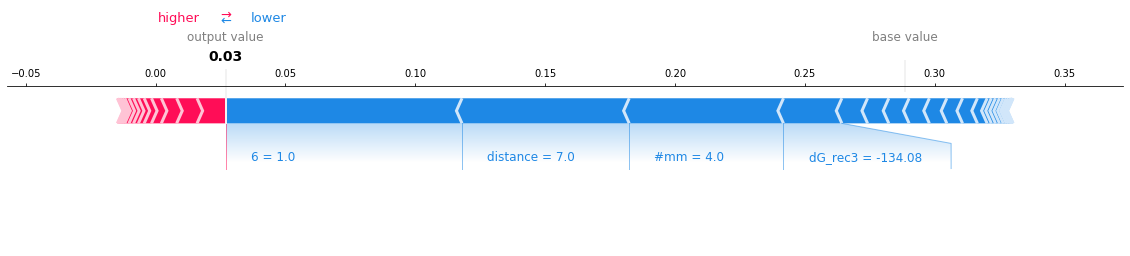

In [53]:
shap_values= explainer.shap_values(x)
shap.force_plot(explainer.expected_value, shap_values[0,:], x.iloc[0,:], matplotlib = "True")

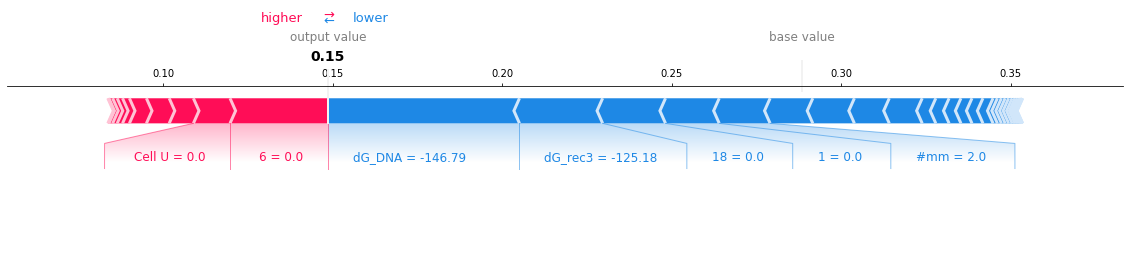

In [54]:
shap.force_plot(explainer.expected_value, shap_values[2,:], x.iloc[2,:], matplotlib=True)

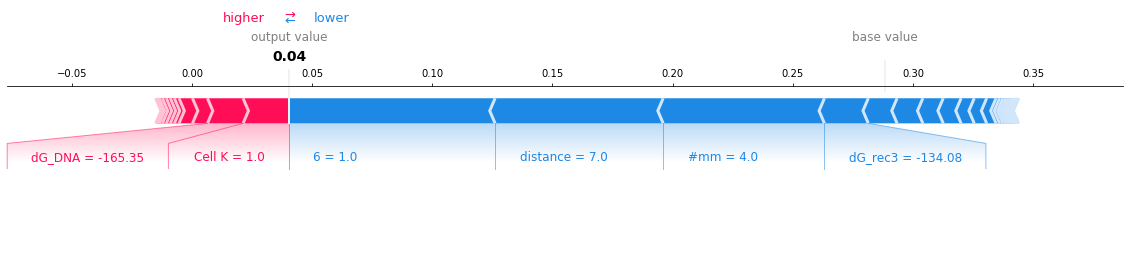

In [55]:
shap.force_plot(explainer.expected_value, shap_values[1,:], x.iloc[1,:], matplotlib=True)

In [56]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x)

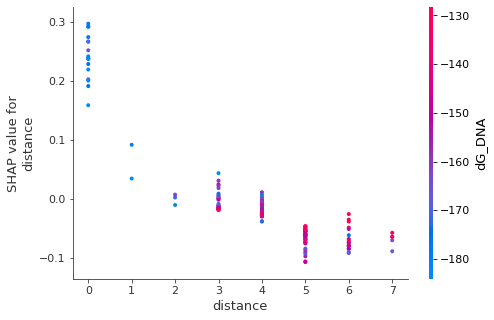

In [57]:
shap.dependence_plot("distance", shap_values, x)

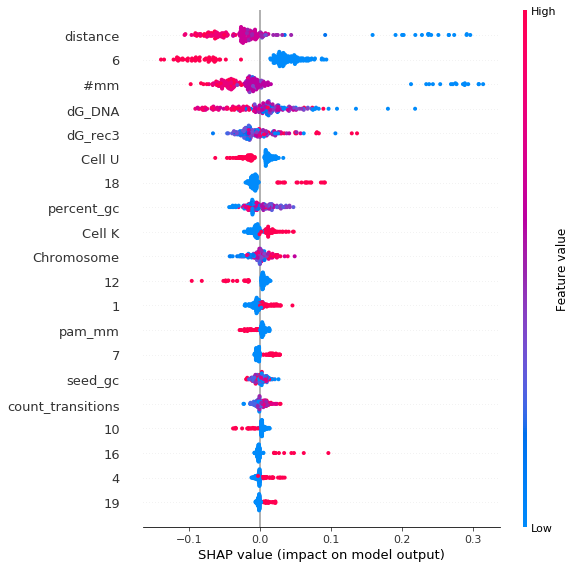

In [58]:
shap.summary_plot(shap_values, x)

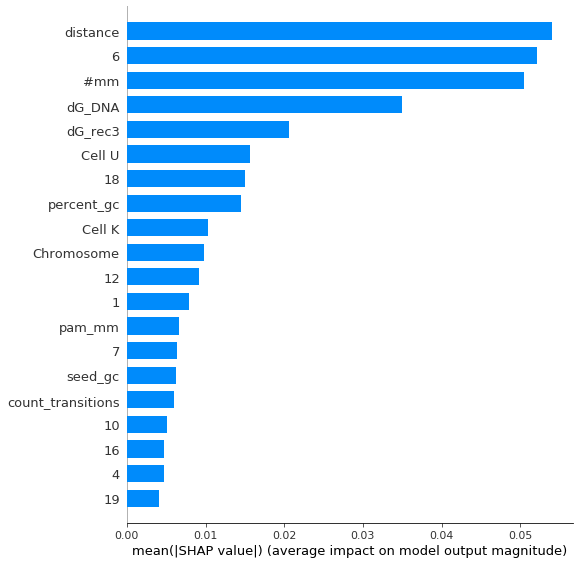

In [59]:
shap.summary_plot(shap_values, x, plot_type="bar")

In [66]:
x.head()

,1,2,3,4,5,6,7,8,9,10,...,pam_mm,pam_transitions,pam_transversions,count_transitions,count_transversions,distance,percent_gc,seed_gc,dG_rec3,dG_DNA
0,1,0,0,0,0,1,0,0,0,0,...,2,2,0,5,0,7,30.434783,50.0,-134.08,-165.35
1,1,0,0,0,0,1,0,0,0,0,...,2,2,0,5,0,7,30.434783,50.0,-134.08,-165.35
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,2,3,47.826087,40.0,-125.18,-146.79
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,2,3,47.826087,40.0,-125.18,-146.79
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,52.173913,50.0,-120.50,-177.14


In [68]:
x.to_excel("D:\\IIT\\PhD projects\\dG study\\dG for off-t sets\\regression_df.xlsx")

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.25, random_state = 3)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print(regressor.intercept_)
print(regressor.coef_)
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)
Y_train_pred = pd.DataFrame(Y_train_pred, columns = ['Predicted'])
Y_test_pred = pd.DataFrame(Y_test_pred, columns = ['Predicted'])
print("Mean absolute error train:", metrics.mean_absolute_error(Y_train, Y_train_pred))
print("Mean absolute error test:", metrics.mean_absolute_error(Y_test, Y_test_pred))
print("Mean squared value train:", metrics.mean_squared_error(Y_train, Y_train_pred))
print("Mean squared value test:", metrics.mean_squared_error(Y_test, Y_test_pred))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))
print("R squared value train:", metrics.r2_score(Y_train, Y_train_pred))
print("R squared value test:", metrics.r2_score(Y_test, Y_test_pred))
print("Variance weighted:", metrics.explained_variance_score(Y_test, Y_test_pred))

0.6067450720319523
[ 0.10209348  0.08620692  0.01696239  0.01047911 -0.04477225 -0.19182077
 -0.05731647  0.000538   -0.07459307 -0.13642205  0.13171056 -0.09375666
  0.08056734 -0.10215934  0.06876635  0.01841253 -0.09992231  0.18348555
 -0.04322418  0.05466342  0.00888744  0.04815632 -0.02854897  0.02565453
  0.052784   -0.07843853  0.0010863  -0.0704941   0.02942949  0.01960735
 -0.0389257   0.05853305 -0.0061664  -0.05544026 -0.04199931  0.00151988
  0.00153455 -0.00174437  0.00143505]
Mean absolute error train: 0.1221664659614249
Mean absolute error test: 0.19723420704735822
Mean squared value train: 0.02507522338708059
Mean squared value test: 0.06542205972914547
Root mean square value: 0.25577736359800385
R squared value train: 0.6731510567100241
R squared value test: 0.4439410547837219
Variance weighted: 0.47159851028412636


In [70]:
from sklearn.preprocessing import PolynomialFeatures

#quadratic regression
poly = PolynomialFeatures(degree = 2)
X2_train = poly.fit_transform(X_train)
X2_test= poly.fit_transform(X_test)
model = regressor.fit(X2_train, Y_train)
print("Mean absolute error:", metrics.mean_absolute_error(Y_test, model.predict(X2_test)))
print("Mean squared value:", metrics.mean_squared_error(Y_test, model.predict(X2_test)))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, model.predict(X2_test))))
print("R squared value:", metrics.r2_score(Y_test, model.predict(X2_test)))
print("Variance weighted:", metrics.explained_variance_score(Y_test, model.predict(X2_test)))

Mean absolute error: 1.2300873702930286
Mean squared value: 3.487831442809967
Root mean square value: 1.867573678013793
R squared value: -32.2596896295534
Variance weighted: -31.821221194050914


In [71]:
#Cubic regressor
poly1 = PolynomialFeatures(degree = 3)
X3_train = poly1.fit_transform(X_train)
X3_test= poly1.fit_transform(X_test)
model1 = regressor.fit(X3_train, Y_train)
print("Mean absolute error:", metrics.mean_absolute_error(Y_test, model1.predict(X3_test)))
print("Mean squared value:", metrics.mean_squared_error(Y_test, model1.predict(X3_test)))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, model1.predict(X3_test))))
print("R squared value:", metrics.r2_score(Y_test, model1.predict(X3_test)))
print("Variance weighted:", metrics.explained_variance_score(Y_test, model1.predict(X3_test)))

Mean absolute error: 0.5127256663592789
Mean squared value: 0.5401782720077544
Root mean square value: 0.7349682115627548
R squared value: -4.151098029304984
Variance weighted: -4.130382713620741


In [87]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr_1 = DecisionTreeRegressor(max_depth=2)
dtr_2 = DecisionTreeRegressor(max_depth=30)
dtr_1.fit(X_train, Y_train)
dtr_2.fit(X_train, Y_train)

y_1 = dtr_1.predict(X_test)
y_2 = dtr_2.predict(X_test)

Y_train_pred1 = dtr_1.predict(X_train)
Y_train_pred2 = dtr_2.predict(X_train)

print("Mean absolute error train:", metrics.mean_absolute_error(Y_train, Y_train_pred1))
print("Mean absolute error test:", metrics.mean_absolute_error(Y_test, y_1))
print("Mean squared value train:", metrics.mean_squared_error(Y_train, Y_train_pred1))
print("Mean squared value test:", metrics.mean_squared_error(Y_test, y_1))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, y_1)))
print("R squared value train:", metrics.r2_score(Y_train, Y_train_pred1))
print("R squared value test:", metrics.r2_score(Y_test, y_1))
print("Variance weighted:", metrics.explained_variance_score(Y_test, y_1))
print("for dtr2, max depth 5")
print("Mean absolute error train:", metrics.mean_absolute_error(Y_train, Y_train_pred2))
print("Mean absolute error test:", metrics.mean_absolute_error(Y_test, y_2))
print("Mean squared value train:", metrics.mean_squared_error(Y_train, Y_train_pred2))
print("Mean squared value test:", metrics.mean_squared_error(Y_test, y_2))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, y_2)))
print("R squared value train:", metrics.r2_score(Y_train, Y_train_pred2))
print("R squared value test:", metrics.r2_score(Y_test, y_2))
print("Variance weighted:", metrics.explained_variance_score(Y_test, y_2))

Mean absolute error train: 0.1708381201523994
Mean absolute error test: 0.21366457111273351
Mean squared value train: 0.044648159485853496
Mean squared value test: 0.08560610562794804
Root mean square value: 0.2925852108838518
R squared value train: 0.45651798238362573
R squared value test: 0.1836668284386911
Variance weighted: 0.23982616856817818
for dtr2, max depth 5
Mean absolute error train: 2.462433120315829e-06
Mean absolute error test: 0.17950471712656682
Mean squared value train: 4.2141859260597043e-10
Mean squared value test: 0.09456897079842835
Root mean square value: 0.3075206835294634
R squared value train: 0.9999999948702605
R squared value test: 0.09819764259938235
Variance weighted: 0.09838049929696457


In [78]:
#Support Vector Regression

from sklearn.svm import SVR
svr_1 = SVR(kernel='rbf')
svr_1.fit(X_train, Y_train)

y_1 = svr_1.predict(X_test)
Y_train_pred1 = dtr_1.predict(X_train)

print("Mean absolute error train:", metrics.mean_absolute_error(Y_train, Y_train_pred1))
print("Mean absolute error test:", metrics.mean_absolute_error(Y_test, y_1))
print("Mean squared value train:", metrics.mean_squared_error(Y_train, Y_train_pred1))
print("Mean squared value test:", metrics.mean_squared_error(Y_test, y_1))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, y_1)))
print("R squared value train:", metrics.r2_score(Y_train, Y_train_pred1))
print("R squared value test:", metrics.r2_score(Y_test, y_1))
print("Variance weighted:", metrics.explained_variance_score(Y_test, y_1))

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


Mean absolute error train: 0.17083812015239946
Mean absolute error test: 0.23570930043814511
Mean squared value train: 0.04464815948585349
Mean squared value test: 0.08353446544691315
Root mean square value: 0.28902329568204904
R squared value train: 0.45651798238362584
R squared value test: 0.20342182823587784
Variance weighted: 0.2054797416403198


In [79]:
svr_1 = SVR(kernel='linear')
svr_1.fit(X_train, Y_train)

y_1 = svr_1.predict(X_test)
Y_train_pred1 = dtr_1.predict(X_train)

print("Mean absolute error train:", metrics.mean_absolute_error(Y_train, Y_train_pred1))
print("Mean absolute error test:", metrics.mean_absolute_error(Y_test, y_1))
print("Mean squared value train:", metrics.mean_squared_error(Y_train, Y_train_pred1))
print("Mean squared value test:", metrics.mean_squared_error(Y_test, y_1))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, y_1)))
print("R squared value train:", metrics.r2_score(Y_train, Y_train_pred1))
print("R squared value test:", metrics.r2_score(Y_test, y_1))
print("Variance weighted:", metrics.explained_variance_score(Y_test, y_1))

Mean absolute error train: 0.17083812015239946
Mean absolute error test: 0.1912176930601391
Mean squared value train: 0.04464815948585349
Mean squared value test: 0.07670363443687393
Root mean square value: 0.2769542100002705
R squared value train: 0.45651798238362584
R squared value test: 0.2685601019830738
Variance weighted: 0.26976016106175116


In [88]:
svr_1 = SVR(kernel='sigmoid')
svr_1.fit(X_train, Y_train)

y_1 = svr_1.predict(X_test)
Y_train_pred1 = dtr_1.predict(X_train)

print("Mean absolute error train:", metrics.mean_absolute_error(Y_train, Y_train_pred1))
print("Mean absolute error test:", metrics.mean_absolute_error(Y_test, y_1))
print("Mean squared value train:", metrics.mean_squared_error(Y_train, Y_train_pred1))
print("Mean squared value test:", metrics.mean_squared_error(Y_test, y_1))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, y_1)))
print("R squared value train:", metrics.r2_score(Y_train, Y_train_pred1))
print("R squared value test:", metrics.r2_score(Y_test, y_1))
print("Variance weighted:", metrics.explained_variance_score(Y_test, y_1))

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


Mean absolute error train: 0.1708381201523994
Mean absolute error test: 0.2507378285340313
Mean squared value train: 0.044648159485853496
Mean squared value test: 0.11452825005563666
Root mean square value: 0.3384202270190667
R squared value train: 0.45651798238362573
R squared value test: -0.09213249353515218
Variance weighted: -2.220446049250313e-16


In [89]:
svr_1 = SVR(kernel='poly')
svr_1.fit(X_train, Y_train)

y_1 = svr_1.predict(X_test)
Y_train_pred1 = dtr_1.predict(X_train)

print("Mean absolute error train:", metrics.mean_absolute_error(Y_train, Y_train_pred1))
print("Mean absolute error test:", metrics.mean_absolute_error(Y_test, y_1))
print("Mean squared value train:", metrics.mean_squared_error(Y_train, Y_train_pred1))
print("Mean squared value test:", metrics.mean_squared_error(Y_test, y_1))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, y_1)))
print("R squared value train:", metrics.r2_score(Y_train, Y_train_pred1))
print("R squared value test:", metrics.r2_score(Y_test, y_1))
print("Variance weighted:", metrics.explained_variance_score(Y_test, y_1))

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


Mean absolute error train: 0.1708381201523994
Mean absolute error test: 595.6839864432096
Mean squared value train: 0.044648159485853496
Mean squared value test: 671029.3710494082
Root mean square value: 819.1638243046431
R squared value train: 0.45651798238362573
R squared value test: -6398882.942464001
Variance weighted: -6227663.1557027595


In [ ]:
#optimize svr linear kernel
svr_1 = SVR(kernel='linear', C=2.5, epsilon=0.27, probability=True)
svr_1.fit(X_train, Y_train)

y_1 = svr_1.predict(X_test)
Y_train_pred1 = dtr_1.predict(X_train)

print("Mean absolute error train:", metrics.mean_absolute_error(Y_train, Y_train_pred1))
print("Mean absolute error test:", metrics.mean_absolute_error(Y_test, y_1))
print("Mean squared value train:", metrics.mean_squared_error(Y_train, Y_train_pred1))
print("Mean squared value test:", metrics.mean_squared_error(Y_test, y_1))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, y_1)))
print("R squared value train:", metrics.r2_score(Y_train, Y_train_pred1))
print("R squared value test:", metrics.r2_score(Y_test, y_1))
print("Variance weighted:", metrics.explained_variance_score(Y_test, y_1))

In [ ]:
# shap for above model
explainer = shap.KernelExplainer(svr_1.expected_value, X_train)
shap_values = explainer.shap_values(X_test, nsamples=100)
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

In [4]:
X = pd.read_excel(r'D:\\IIT\\PhD projects\\_dG study\\dG for off-t sets\\regression_df.xlsx').iloc[:,1:]

In [5]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,pam_mm,pam_transitions,pam_transversions,count_transitions,count_transversions,distance,percent_gc,seed_gc,dG_rec3,dG_DNA
0,1,0,0,0,0,1,0,0,0,0,...,2,2,0,5,0,7,30.434783,50,-134.08,-165.35
1,1,0,0,0,0,1,0,0,0,0,...,2,2,0,5,0,7,30.434783,50,-134.08,-165.35
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,2,3,47.826087,40,-125.18,-146.79
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,2,3,47.826087,40,-125.18,-146.79
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,52.173913,50,-120.50,-177.14


In [8]:
y = []
for i in range(len(df)):
    y.append(df.loc[i,"reads/target/cell line"])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.25, random_state = 3)

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

regr = MLPRegressor(hidden_layer_sizes=256, random_state=1, max_iter=1000).fit(X_train, Y_train)
Y_train_pred = regr.predict(X_train)
y_pred = regr.predict(X_test)
#regr.score(X_test, y_test)

print("Mean absolute error train:", metrics.mean_absolute_error(Y_train, Y_train_pred))
print("Mean absolute error test:", metrics.mean_absolute_error(Y_test, y_pred))
print("Mean squared value train:", metrics.mean_squared_error(Y_train, Y_train_pred))
print("Mean squared value test:", metrics.mean_squared_error(Y_test, y_pred))
print("Root mean square value:", np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print("R squared value train:", metrics.r2_score(Y_train, Y_train_pred))
print("R squared value test:", metrics.r2_score(Y_test, y_pred))
print("Variance weighted:", metrics.explained_variance_score(Y_test, y_pred))

Mean absolute error train: 0.1259964733750029
Mean absolute error test: 0.19169508182942396
Mean squared value train: 0.030057005027673854
Mean squared value test: 0.06869480604175723
Root mean square value: 0.262096940160997
R squared value train: 0.6082148429904586
R squared value test: 0.4161241399680512
Variance weighted: 0.4669342345341939
